# Review Classification - Laptop

In [1]:
#import the dataset
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows',None)

df=pd.read_csv("Laptop Rating.csv")
df.head()

,Unnamed: 0,Rating,Heading,Review,Product
0,0,5.0,Did not meet expectations,Speakers are not working properly right from t...,Laptop
1,1,5.0,Classy product,"The laptop is blazingly fast for games, Deep l...",Laptop
2,2,NaN,Perfect product!,"After thorough research, selected this laptop....",Laptop
3,3,NaN,NaN,NaN,Laptop
4,4,NaN,NaN,NaN,Laptop


#### Observations:
* The feature unnamed is index. Hence we can drop this feature.

In [2]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Rating,Heading,Review,Product
0,5.0,Did not meet expectations,Speakers are not working properly right from t...,Laptop
1,5.0,Classy product,"The laptop is blazingly fast for games, Deep l...",Laptop
2,NaN,Perfect product!,"After thorough research, selected this laptop....",Laptop
3,NaN,NaN,NaN,Laptop
4,NaN,NaN,NaN,Laptop


# Exploratory Data Analysis

In [3]:
#check the dimensions of the data (Headphone)
df.shape

(15725, 4)

#### Observations
* The dataset has 15725 rows and 4 columns
* The dataset has 1 label - 'Rating' and 3 features

In [4]:
#check the names of columns in dataset
df.columns

Index(['Rating', 'Heading', 'Review', 'Product'], dtype='object')

In [5]:
#check the datatype of each feature
df.dtypes

Rating     float64
Heading     object
Review      object
Product     object
dtype: object

#### Observations:
   * All the feratures are of "object" data type.

In [6]:
#checking if there are any null values in the dataset
df.isna().sum()

Rating     1086
Heading    1065
Review     1063
Product       0
dtype: int64

In [7]:
#dropping all numm values
df.dropna(inplace=True)

In [8]:
#cross checking null values
df.isna().sum()

Rating     0
Heading    0
Review     0
Product    0
dtype: int64

In [9]:
df.shape

(14637, 4)

#### Observations:
* There are 14637 rows in the dataset

In [10]:
df['Rating'].value_counts()

5.0    9351
4.0    3068
1.0     998
3.0     946
2.0     274
Name: Rating, dtype: int64

#### Observations:
* The ratings are inbalanced. 
* Most of the ratings are 5 star.

In [11]:
#check number of unique values in each class;
df.nunique()

Rating        5
Heading     236
Review     7862
Product       1
dtype: int64

#### Observations:
* The label rating has 5 unique values: 1, 2, 3, 4, 5
* The headings can be duplicate as it is kind of summary of the review.
* The reviews should be unique. Hence, we will drop the duplicate reviews to avoid over-fitting.

In [12]:
df.drop_duplicates(subset='Review', inplace=True)

In [13]:
#cross checking for diplicacy of reviews
print(df.shape)
print(df.nunique())

(7862, 4)
Rating        5
Heading     234
Review     7862
Product       1
dtype: int64


#### Observations:
* We have 7862 unique reviews for laptops
* There are only 234 unique headings in the data set.
* If the classification is to be done based on the heading, then only unique headings must be considered.
* In the model building stage we will classfiy from unique headings as well.

In [14]:
#checking the length of review
df['Review_word_counter']=df['Review'].str.strip().str.len()
df.head()

,Rating,Heading,Review,Product,Review_word_counter
0,5.0,Did not meet expectations,Speakers are not working properly right from t...,Laptop,371
1,5.0,Classy product,"The laptop is blazingly fast for games, Deep l...",Laptop,510
8,5.0,Perfect product!,"After thorough research, selected this laptop....",Laptop,256
9,1.0,Absolute rubbish!,Worst experience ever on online shopping. I go...,Laptop,180
10,5.0,Classy product,"Its a genuine laptop sold by this seller, benc...",Laptop,136


In [15]:
from sklearn.utils import shuffle
df=shuffle(df)
df.reset_index(inplace=True,drop=True)

In [16]:
df.head()

,Rating,Heading,Review,Product,Review_word_counter
0,5.0,Wonderful,Awesome Product in this prize range... No issu...,Laptop,100
1,5.0,Highly recommended,Worth every penny💜\nAmazing laptop 💯,Laptop,35
2,4.0,Delightful,"Unbelievably slow, freezes almost all the time...",Laptop,480
3,5.0,Fabulous!,Good product for the price 🔥\nGood specificati...,Laptop,68
4,4.0,Very Good,At this price cheap & Best.,Laptop,27


### Exploratory Data Analysis

In [17]:
#check the dimensions of the data
df.shape

(7862, 5)

#### Observtions:
* The dataset has 7862 rows and 4 columns

In [18]:
#check the names of columns in dataset
df.columns

Index(['Rating', 'Heading', 'Review', 'Product', 'Review_word_counter'], dtype='object')

In [19]:
#check the datatype of each feature
df.dtypes

Rating                 float64
Heading                 object
Review                  object
Product                 object
Review_word_counter      int64
dtype: object

#### Observations:
   * There are three columns with "object" data type they are "Heading", "Review" and "Product".
   * There is one column (label) with float data type.

In [20]:
#checking if there are any null values in the dataset
df.isnull().sum()

Rating                 0
Heading                0
Review                 0
Product                0
Review_word_counter    0
dtype: int64

#### Observations:
   * There are no null values in the entire dataset

In [21]:
df['Rating'].value_counts()

5.0    4587
4.0    1729
1.0     758
3.0     565
2.0     223
Name: Rating, dtype: int64

#### Observations:
* There are more number of 5 star rated reviews.
* There are very less number of 2 star rated reviews.
* The data set is not perfectly balanced.

In [22]:
#Separation of rating as different labels.
df['1 Star']=df.apply(lambda x: 1 if x['Rating']==1 else 0, axis=1)
df['2 Star']=df.apply(lambda x: 1 if x['Rating']==2 else 0, axis=1)
df['3 Star']=df.apply(lambda x: 1 if x['Rating']==3 else 0, axis=1)
df['4 Star']=df.apply(lambda x: 1 if x['Rating']==4 else 0, axis=1)
df['5 Star']=df.apply(lambda x: 1 if x['Rating']==5 else 0, axis=1)

In [23]:
df.head(20)

,Rating,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,5.0,Wonderful,Awesome Product in this prize range... No issu...,Laptop,100,0,0,0,0,1
1,5.0,Highly recommended,Worth every penny💜\nAmazing laptop 💯,Laptop,35,0,0,0,0,1
2,4.0,Delightful,"Unbelievably slow, freezes almost all the time...",Laptop,480,0,0,0,1,0
3,5.0,Fabulous!,Good product for the price 🔥\nGood specificati...,Laptop,68,0,0,0,0,1
4,4.0,Very Good,At this price cheap & Best.,Laptop,27,0,0,0,1,0
5,3.0,Does the job,Little bit slow,Laptop,15,0,0,1,0,0
6,2.0,Slightly disappointed,Although really good at design and display. My...,Laptop,294,0,1,0,0,0
7,4.0,Wonderful,It is actually quite good in this price..good ...,Laptop,120,0,0,0,1,0
8,5.0,Worth every penny,An Awesome product with having all the abiliti...,Laptop,110,0,0,0,0,1
9,3.0,Good,Packaging Problem.\nLaptop was in good conditi...,Laptop,112,0,0,1,0,0


In [24]:
df.drop(['Rating'], axis=1, inplace= True)

In [25]:
#statistical analysis
df.describe()

,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
count,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000
mean,130.771814,0.096413,0.028364,0.071865,0.219919,0.583439
std,140.772315,0.295176,0.166022,0.258280,0.414218,0.493020
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.500000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,175.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,510.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observations
 * For all the labels the minimum value is zero and maximum is 1. As there are only binary classes deviations cannot be studied

In [26]:
#checking the skewness
df.skew()

Review_word_counter    1.511968
1 Star                 2.735249
2 Star                 5.683056
3 Star                 3.316123
4 Star                 1.352684
5 Star                -0.338569
dtype: float64

#### observations
* The highest skewness is seen in 2 Star rating

# Visualizations

In [27]:
#import libraries required for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

average length of review: 130.8


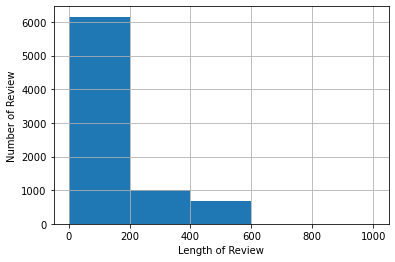

In [28]:
#plotting the average length of reviews
review=df["Review"]
x = [len(review[i]) for i in range(review.shape[0])]

print('average length of review: {:.1f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000]
plt.hist(x, bins=bins)
plt.xlabel('Length of Review')
plt.ylabel('Number of Review')       
plt.grid(True)
plt.show()

#### Observations:
* The average length of review is 130.
* Maximum number of reviews had less than 200 words.
* There were no reviews with more than 600 words.
* Comments with 200 and above words were less.

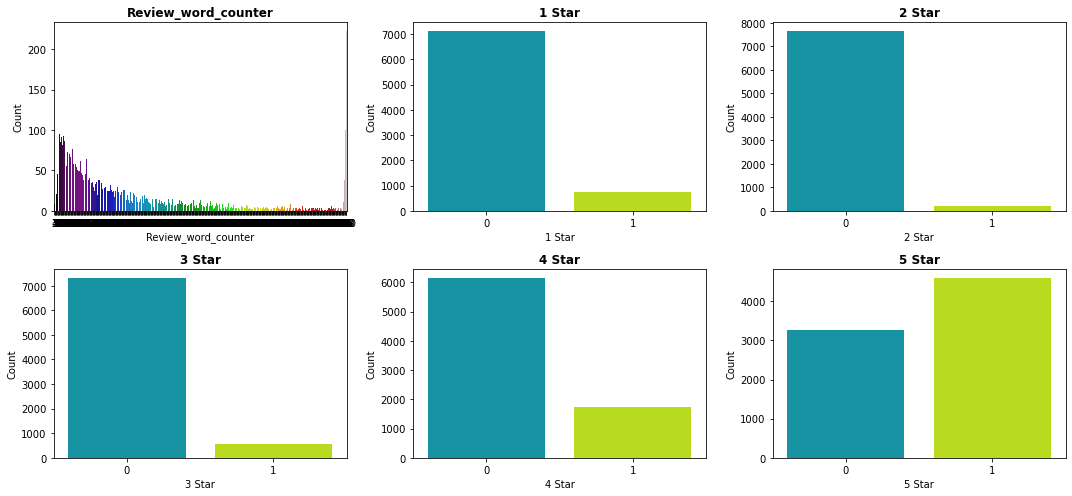

In [29]:
#let us plot countplot of each feature
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))
for cols in df.columns:
    if df[cols].dtypes=='int64':
        plt.subplot(a, b, c)
        plt.title('{}'.format(cols),weight='bold')
        sns.countplot(df[cols],palette='nipy_spectral')
        plt.xticks(rotation=360)
        c = c + 1
        plt.tight_layout()
        plt.ylabel("Count")
plt.show()

#### Obseravtions:
   * More than 50% of the review are rated 5 star.
   * 2 star rated reviews are least in number

In [30]:
print(list(df.columns.values))

['Heading', 'Review', 'Product', 'Review_word_counter', '1 Star', '2 Star', '3 Star', '4 Star', '5 Star']


In [31]:
#make a list of columns
categories = list(df.columns.values)
categories = categories[4:]
print(categories)

['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']


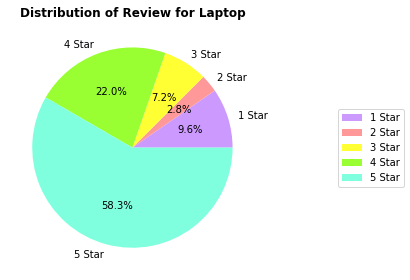

In [32]:
#distribution plot of each type of review
colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] 
df_distribution = df[categories].sum()

df_distribution.plot.pie(y='count',autopct='%1.1f%%',colors=colors)\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.ylabel("")
plt.title("Distribution of Review for Laptop",fontweight='bold')
plt.tight_layout()
plt.show()

#### Observations:
* 5 Star rating had the highest share of 58.3%, followed by 4 star with 22%.
* 2 Star rating has least share with 2.8%

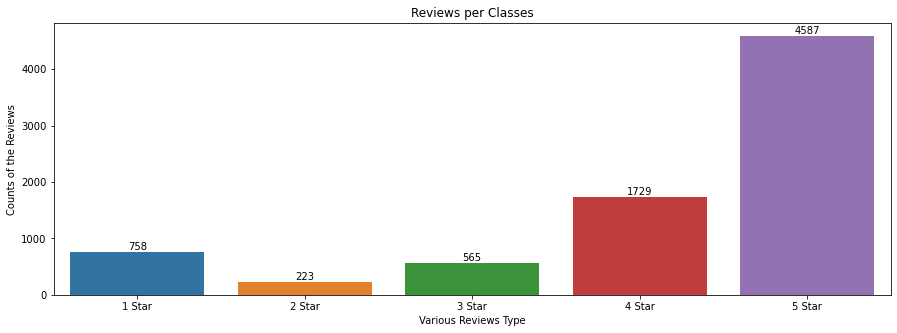

In [364]:
# Checking the count of the various types of reviews
cols = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
val_counts = df[cols].sum()

plt.figure(figsize=(15,5))
ax = sns.barplot(val_counts.index, val_counts.values)

plt.title("Reviews per Classes")
plt.xlabel("Various Reviews Type")
plt.ylabel("Counts of the Reviews")

rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom")


plt.show()

#### Observations
* There were 4587 5 Star rated reviews which are maximum. 
* 4 Star reviews were second highest with count of 1729
* 2 Star ratings have the least count of only 223.

##  Data Pre-Processing

In [365]:
#convert all text into lowercase 
df['Review'] = df['Review'].str.lower()
df['Heading'] = df['Heading'].str.lower()
#check if the text is lower cased
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,mind-blowing purchase,"good product , exlent design .",Laptop,30,0,0,0,0,1
1,awesome,-good for programing....(not for gaming purpos...,Laptop,207,0,0,0,0,1
2,wonderful,have been using this for almost three months n...,Laptop,483,0,0,0,0,1
3,could be way better,laptop heating problem,Laptop,22,0,1,0,0,0
4,just okay,for battery this is not good only 3 to 4 hours...,Laptop,509,0,0,1,0,0


In [366]:
#clean all html tags 
import re
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
#apply the function 
df['Review'] = df['Review'].apply(cleanHtml)
df['Heading'] = df['Heading'].apply(cleanHtml)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,mind-blowing purchase,"good product , exlent design .",Laptop,30,0,0,0,0,1
1,awesome,-good for programing....(not for gaming purpos...,Laptop,207,0,0,0,0,1
2,wonderful,have been using this for almost three months n...,Laptop,483,0,0,0,0,1
3,could be way better,laptop heating problem,Laptop,22,0,1,0,0,0
4,just okay,for battery this is not good only 3 to 4 hours...,Laptop,509,0,0,1,0,0


In [367]:
#remove punctuations
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
#call the function
df['Review'] = df['Review'].apply(cleanPunc)
df['Heading'] = df['Heading'].apply(cleanPunc)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,mind-blowing purchase,good product exlent design,Laptop,30,0,0,0,0,1
1,awesome,-good for programing not for gaming purpos...,Laptop,207,0,0,0,0,1
2,wonderful,have been using this for almost three months n...,Laptop,483,0,0,0,0,1
3,could be way better,laptop heating problem,Laptop,22,0,1,0,0,0
4,just okay,for battery this is not good only 3 to 4 hours...,Laptop,509,0,0,1,0,0


In [368]:
# any alphabets from small a to small z or capital A to capital Z.
#The plus sign specifies that string should have at least one character.
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
#apply the function
df['Review'] = df['Review'].apply(keepAlpha)
df['Heading'] = df['Heading'].apply(keepAlpha)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,mind blowing purchase,good product exlent design,Laptop,30,0,0,0,0,1
1,awesome,good for programing not for gaming purpose no...,Laptop,207,0,0,0,0,1
2,wonderful,have been using this for almost three months n...,Laptop,483,0,0,0,0,1
3,could be way better,laptop heating problem,Laptop,22,0,1,0,0,0
4,just okay,for battery this is not good only to hours...,Laptop,509,0,0,1,0,0


In [369]:
#import libraries for stemming and stopwords removal
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [370]:
#removing stopwords
stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
#apply the remove_stopwords function
df['Review'] = df['Review'].apply(removeStopWords)
df['Heading'] = df['Heading'].apply(removeStopWords)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,mind blowing purchase,good product exlent design,Laptop,30,0,0,0,0,1
1,awesome,good programing gaming purpose heating is...,Laptop,207,0,0,0,0,1
2,wonderful,using almost three months primary law...,Laptop,483,0,0,0,0,1
3,could way better,laptop heating problem,Laptop,22,0,1,0,0,0
4,okay,battery good hours feel sometime l...,Laptop,509,0,0,1,0,0


In [371]:
#stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df['Review'] = df['Review'].apply(stemming)
df['Heading'] = df['Heading'].apply(stemming)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,mind blow purchas,good product exlent design,Laptop,30,0,0,0,0,1
1,awesom,good program game purpos heat issu surpris hor...,Laptop,207,0,0,0,0,1
2,wonder,use almost three month primari lawyer use most...,Laptop,483,0,0,0,0,1
3,could way better,laptop heat problem,Laptop,22,0,1,0,0,0
4,okay,batteri good hour feel sometim leg screen one ...,Laptop,509,0,0,1,0,0


In [372]:
import emoji
def emoji_remover(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

df['Review'] = df['Review'].apply(emoji_remover)
df['Heading'] = df['Heading'].apply(emoji_remover)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,mind blow purchas,good product exlent design,Laptop,30,0,0,0,0,1
1,awesom,good program game purpos heat issu surpris hor...,Laptop,207,0,0,0,0,1
2,wonder,use almost three month primari lawyer use most...,Laptop,483,0,0,0,0,1
3,could way better,laptop heat problem,Laptop,22,0,1,0,0,0
4,okay,batteri good hour feel sometim leg screen one ...,Laptop,509,0,0,1,0,0


Modelling will be done on heading of reviews as well as on actual review. But there are duplicate values in the heading. Thus we will use only unique heading for model development

# Modelling on Heading of Reviews

In [373]:
df_heading = df.drop_duplicates(subset='Heading')
df_heading.shape

(220, 9)

In [374]:
df_heading = shuffle(df_heading)
df_heading.reset_index(drop=True,inplace=True)

In [375]:
df_heading.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,rariti price,premium build qualiti laptop anyon find price ...,Laptop,434,0,0,0,1,0
1,pleas avoid purchas,avoid devic display bad ultra bad even thing l...,Laptop,406,1,0,0,0,0
2,best game laptop l,batteri speaker averag everyth els op,Laptop,61,0,0,0,1,0
3,happi choic,network field weight size ethernet port matter...,Laptop,109,0,0,0,0,1
4,brilliant good product,good qualiti laptop realm introduc good laptop...,Laptop,242,0,0,0,0,1


In [376]:
# Separation of Labels and Features
x = df_heading['Heading']
y = df_heading[['1 Star','2 Star','3 Star','4 Star','5 Star']]

In [377]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
x = tf.fit_transform(x)

In [378]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

### Understanding few concepts before actual model building

### Studying the evaluation metrics

#### 1) Label ranking average precision (LRAP)
It is the average over each ground truth label assigned to each sample, of the ratio of true vs. total labels with lower score.

This metric is used in multilabel ranking problem, where the goal is to give better rank to the labels associated to each sample.

* The obtained score is always strictly greater than 0 and the best value is 1.

#### 2) Ranking loss measure.

Compute the average number of label pairs that are incorrectly ordered given y_score weighted by the size of the label set and the number of labels not in the label set.

This is similar to the error set size, but weighted by the number of relevant and irrelevant labels.  The best performance is achieved with a ranking loss of zero.

#### 3) Hamming loss
it is important to note that unlikely accuracy in hamming loss the smaller the result is the better is the model. for an example if hamming loss, is 0.32 which means that if you are trying to predict the aspects of 100 sentences the model will predict incorrectly about 32% of the independent aspects.
* hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 4) Precision
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
* The best value is 1 and the worst value is 0.

#### 5) Coverage error
Coverage error measure.

Compute how far we need to go through the ranked scores to cover all true labels. The best value is equal to the average number of labels in y_true per sample.
* The best value of coverage is when it is equal to average number of true class labels.

#### 6) Log loss
This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true . The log loss is only defined for two or more labels.
The bolder the probabilities, the better will be your Log Loss — closer to zero. It is a measure of uncertainty (you may call it entropy), so a low Log Loss means a low uncertainty/entropy of your model. 

#### 7) Hamming loss
The Hamming loss is the fraction of labels that are incorrectly predicted.
hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 8)  Confusion matrix for multi-label
In multilabel confusion matrix MCM, the count of true negatives is MCM(0,0) , false negatives is MCM(1,0), true positives is MCM(1,1)  and false positives is(0,1) .



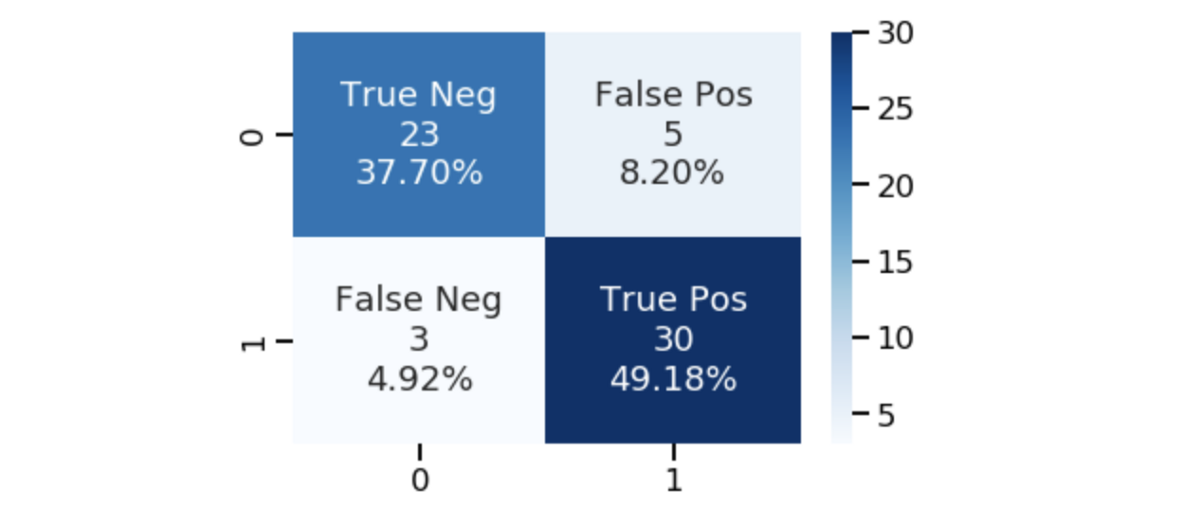

In [379]:
#importing libraries for evaluation
from sklearn.metrics import hamming_loss,accuracy_score,log_loss,f1_score
from sklearn.metrics import coverage_error,precision_score,label_ranking_average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import cross_val_score

# Building model based on Heading of review

### 1) Power Transformation

### 1.1 Binary relevance with GuassianNb as base classifier

In [380]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,x,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  25.454545454545453
Cross validation score= 34.5304208317907


log loss= 10.645617069209592
hamming loss= 0.33090909090909093


f1 score= 0.4347826086956522
average precision score= 0.330188679245283
AUC ROC score= 0.60315503875969


label ranking average precision score= 0.4578787878787876
coverage area= 3.4




In [381]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[33, 17],
        [ 1,  4]],

       [[42,  8],
        [ 3,  2]],

       [[39, 13],
        [ 2,  1]],

       [[23, 20],
        [ 6,  6]],

       [[12, 13],
        [ 8, 22]]])

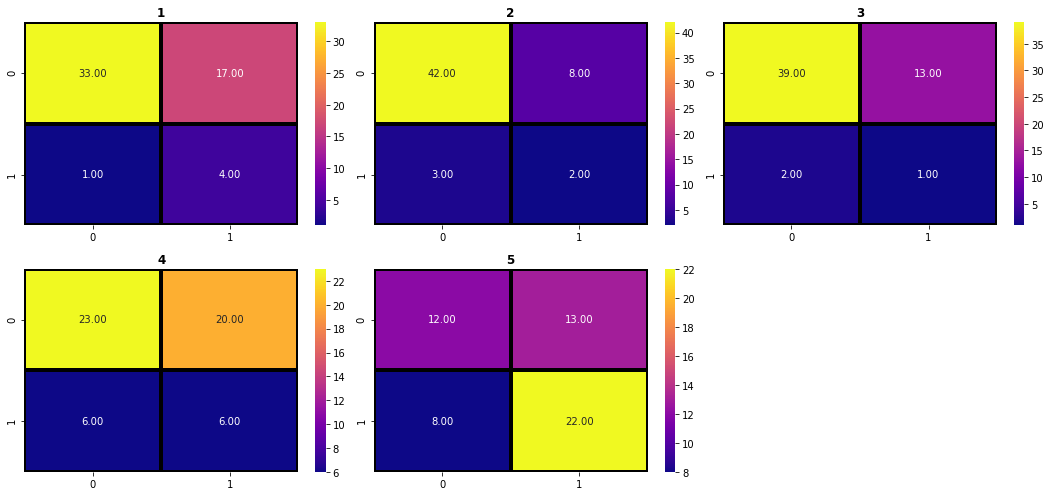

In [382]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 1.2 Label powerset

In [383]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,x,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_lps)

Accuracy =  34.54545454545455
Cross validation score= 41.36122423793656


log loss= 22.607199094850632
hamming loss= 0.26181818181818184


AUC ROC score= 0.5806774001192606
f1 score= 0.34545454545454546
average precision score= 0.34545454545454546


coverage area= 3.618181818181818
label ranking average precision score= 0.4763636363636361


In [384]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[44,  6],
        [ 2,  3]],

       [[42,  8],
        [ 3,  2]],

       [[44,  8],
        [ 3,  0]],

       [[35,  8],
        [ 8,  4]],

       [[19,  6],
        [20, 10]]])

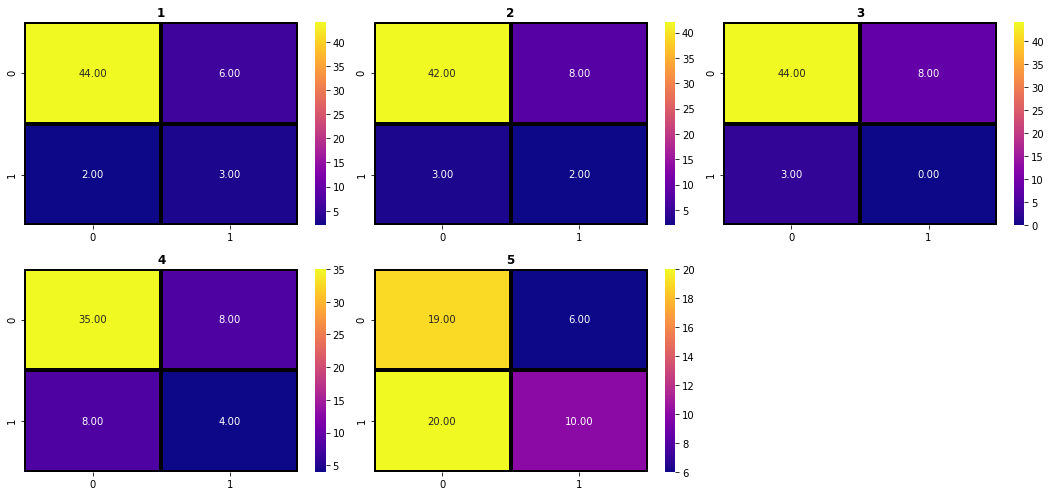

In [385]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [386]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,x,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_cc)

Accuracy =  47.27272727272727
Cross validation score= 45.927434283598664


log loss= 12.822917620184016
hamming loss= 0.1781818181818182


AUC ROC score= 0.5133410852713178
f1 score= 0.5148514851485148
average precision score= 0.5652173913043478


coverage area= 3.109090909090909
label ranking average precision score= 0.5781818181818179


In [387]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[50,  0],
        [ 5,  0]],

       [[50,  0],
        [ 5,  0]],

       [[52,  0],
        [ 3,  0]],

       [[42,  1],
        [11,  1]],

       [[ 6, 19],
        [ 5, 25]]])

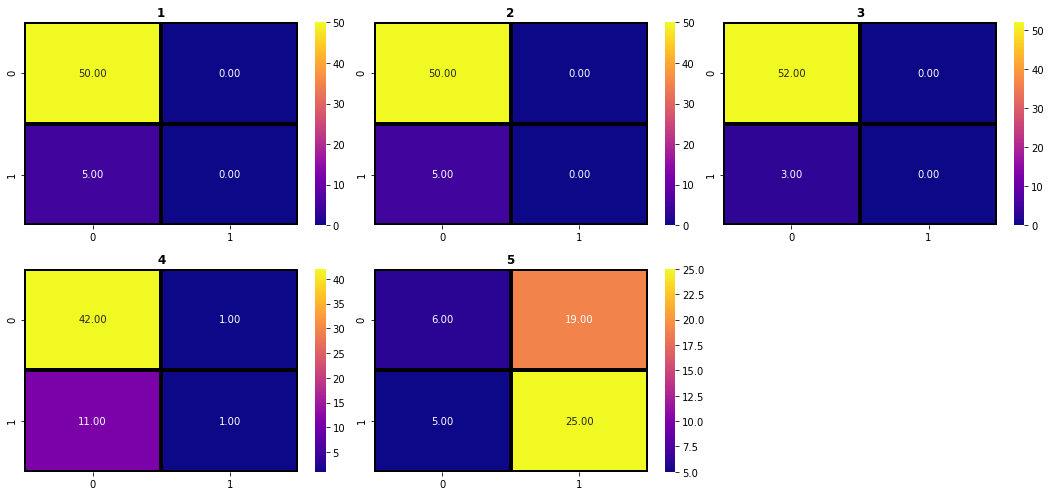

In [388]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 3) Adapted Algorithm
Adapted algorithm, as the name suggests, adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

For example, multi-label version of kNN is represented by MLkNN. So, let us quickly implement this on our randomly generated data set.

In [389]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,x,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  41.81818181818181
Cross validation score= 45.01419227446624


log loss= 11.713274652408543
hamming loss= 0.18181818181818182


AUC ROC score= 0.59912343470483
f1 score= 0.47916666666666663
average precision score= 0.5609756097560976


label ranking average precision score= 0.5345454545454542
coverage area= 3.327272727272727


In [390]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[48,  2],
        [ 3,  2]],

       [[50,  0],
        [ 5,  0]],

       [[51,  1],
        [ 2,  1]],

       [[37,  6],
        [ 9,  3]],

       [[16,  9],
        [13, 17]]])

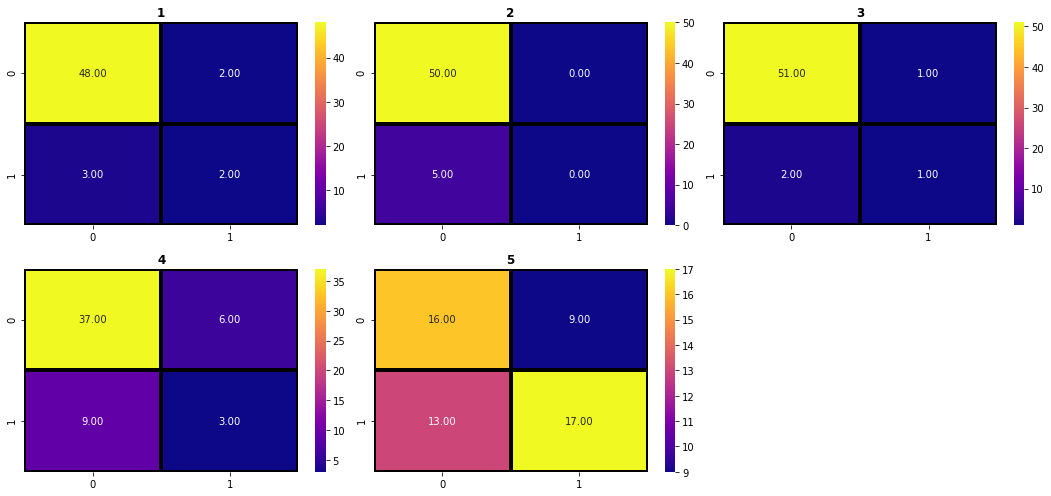

In [391]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### Comparing all the models performance

In [392]:
#creating a comparision table for better understanding

df_comparison_heading=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison_heading.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Classifier chain,47.272727,45.927434,0.178182,12.822918,0.513341,0.514851,0.565217,3.109091,0.578182
1,Adapted algorithm,41.818182,45.014192,0.181818,11.713275,0.599123,0.479167,0.560976,3.327273,0.534545
2,Label powerset,34.545455,41.361224,0.261818,22.607199,0.580677,0.345455,0.345455,3.618182,0.476364
3,Binary Relevance,25.454545,34.530421,0.330909,10.645617,0.603155,0.434783,0.330189,3.400000,0.457879


#### Conclusion:
* The hamming loss for Classifier Chain is the least among all.
* The log loss is least for Binary Relevance.
* The AUC ROC Score for Binary Relevance is maximum which is 0.7
* The accuracy score of Classifier Chain is best out of 4 selected models.

# Building model based on actual reviews and evaluation of its performance

In [393]:
# Separation of Labels and Features
z = df['Review']
y = df[['1 Star','2 Star','3 Star','4 Star','5 Star']]

In [394]:
z.shape

(7862,)

In [395]:
y.shape

(7862, 5)

In [396]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
z = tf.fit_transform(z)

In [397]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.25, random_state=123)

# 1) Power Transformation
# 1.1 Binary relevance with GuassianNb as base classifier

In [399]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,z,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  13.835198372329604
Cross validation score= 15.199620796211455


log loss= 19.132785790973777
hamming loss= 0.47589013224821974


f1 score= 0.2522378516624041
average precision score= 0.1839160839160839
AUC ROC score= 0.5404854970892717


label ranking average precision score= 0.3510851135978342
coverage area= 3.940996948118006




In [400]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[ 985,  809],
        [  64,  108]],

       [[1399,  501],
        [  43,   23]],

       [[ 907,  907],
        [  71,   81]],

       [[ 364, 1186],
        [  92,  324]],

       [[ 708,   98],
        [ 907,  253]]])

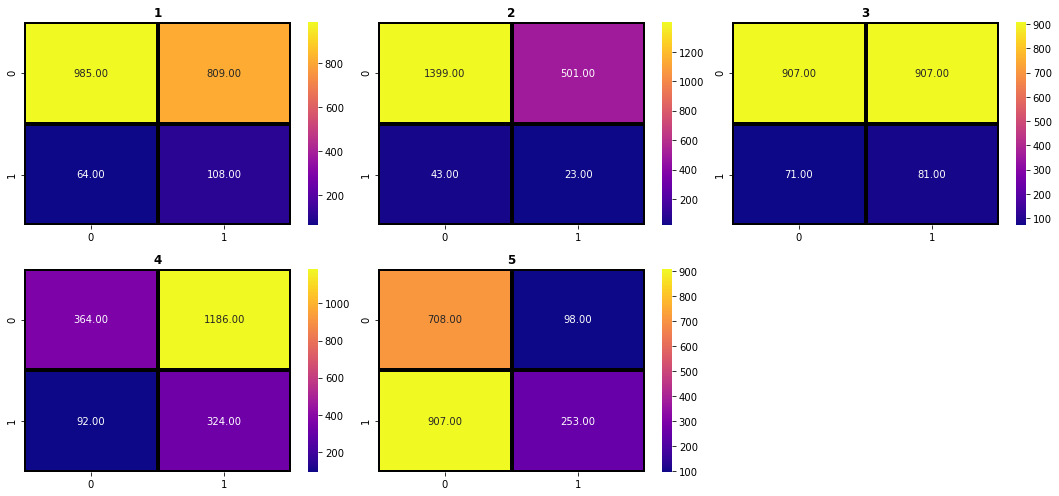

In [401]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 1.2 Label powerset

In [402]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,z,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_lps)

Accuracy =  21.363173957273652
Cross validation score= 22.182625554219058


log loss= 27.160197510952155
hamming loss= 0.3145473041709054


AUC ROC score= 0.5290634300235928
f1 score= 0.2136317395727365
average precision score= 0.2136317395727365


coverage area= 4.145473041709054
label ranking average precision score= 0.3709053916581958


In [403]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[1684,  110],
        [ 132,   40]],

       [[1455,  445],
        [  43,   23]],

       [[1313,  501],
        [ 117,   35]],

       [[1184,  366],
        [ 310,  106]],

       [[ 682,  124],
        [ 944,  216]]])

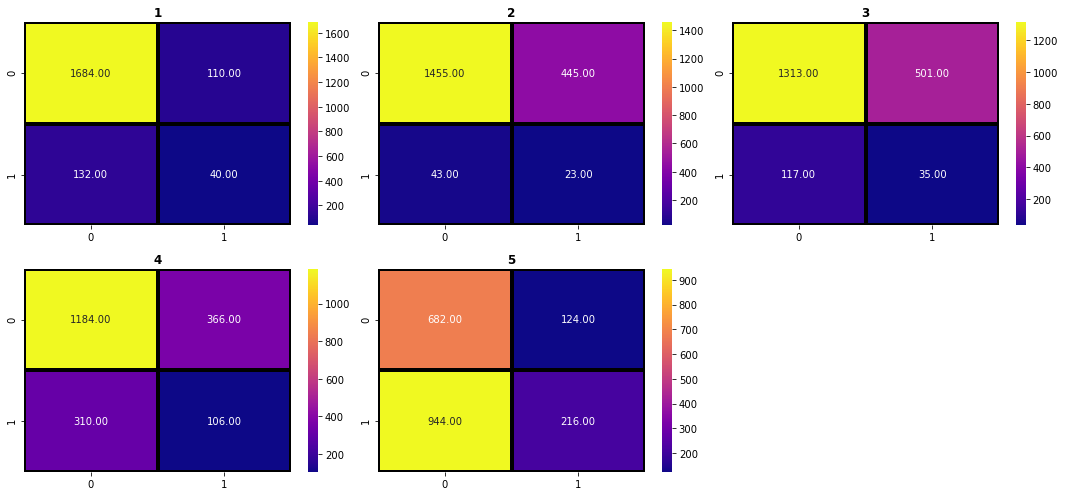

In [404]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [409]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,z,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_cc)

Accuracy =  58.290946083418106
Cross validation score= 57.33919031350814


log loss= 9.297227063413738
hamming loss= 0.1358087487283825


AUC ROC score= 0.5375368183637134
f1 score= 0.6319272125723738
average precision score= 0.6899458157736303


coverage area= 2.668362156663276
label ranking average precision score= 0.6663275686673552


In [410]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[1792,    2],
        [ 168,    4]],

       [[1900,    0],
        [  66,    0]],

       [[1814,    0],
        [ 152,    0]],

       [[1549,    1],
        [ 413,    3]],

       [[ 294,  512],
        [  21, 1139]]])

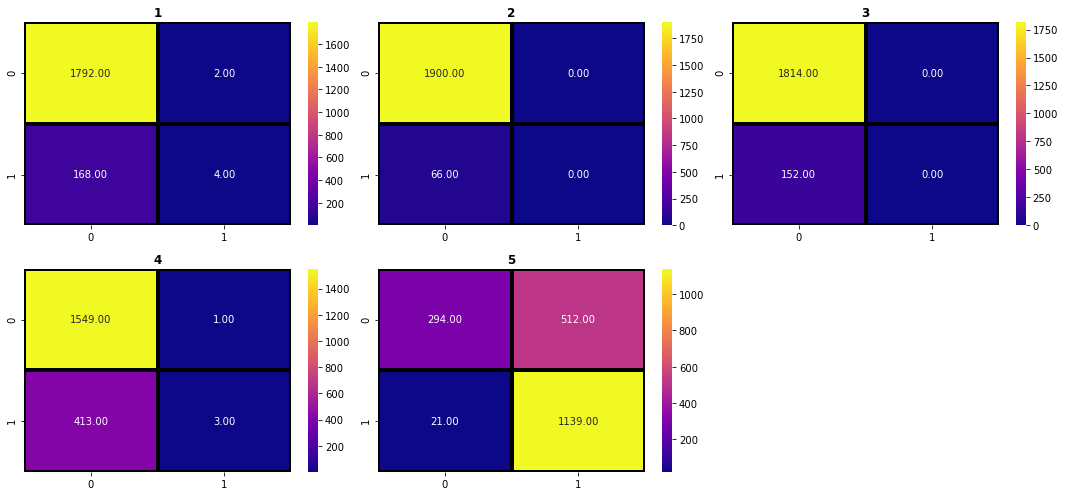

In [411]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 3) Adapted Algorithm

In [412]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,z,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  54.88301119023398
Cross validation score= 54.73143614940202


log loss= 10.87627189659708
hamming loss= 0.15188199389623602


AUC ROC score= 0.6031547628592322
f1 score= 0.5910709394686386
average precision score= 0.6403560830860534


label ranking average precision score= 0.6390640895218823
coverage area= 2.804679552390641


In [413]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[1733,   61],
        [  79,   93]],

       [[1888,   12],
        [  64,    2]],

       [[1770,   44],
        [ 141,   11]],

       [[1384,  166],
        [ 337,   79]],

       [[ 483,  323],
        [ 266,  894]]])

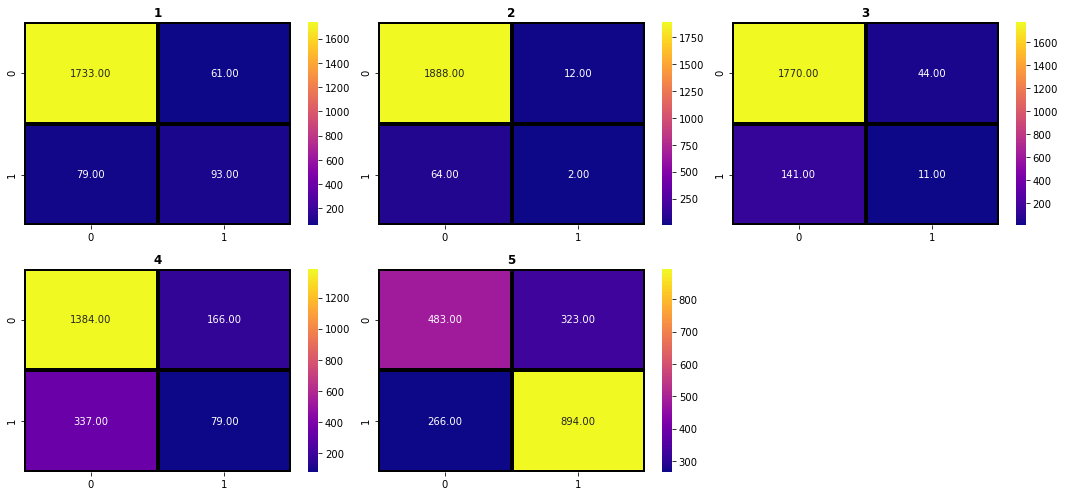

In [414]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()
  

# Comparing all the models performance

In [415]:
#creating a comparision table for better understanding

df_comparison_review=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison_review.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Classifier chain,58.290946,57.339190,0.135809,9.297227,0.537537,0.631927,0.689946,2.668362,0.666328
1,Adapted algorithm,54.883011,54.731436,0.151882,10.876272,0.603155,0.591071,0.640356,2.804680,0.639064
2,Label powerset,21.363174,22.182626,0.314547,27.160198,0.529063,0.213632,0.213632,4.145473,0.370905
3,Binary Relevance,13.835198,15.199621,0.475890,19.132786,0.540485,0.252238,0.183916,3.940997,0.351085


#### Conclusion:
* The hamming loss for Classifier Chain is the least among all.
* The log loss is least for Classifier Chain.
* The AUC ROC Score for Adapted Algorithm is maximum which is 0.6
* The accuracy score of Classifier Chain is best out of 4 selected models.

# Comparison of Model performance for heading and review

In [417]:
df_comparison_heading['Data']='Heading'
df_comparison_review['Data']='Review'
df_merged=pd.concat([df_comparison_heading,df_comparison_review])
df_merged

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking,Data
0,Binary Relevance,25.454545,34.530421,0.330909,10.645617,0.603155,0.434783,0.330189,3.400000,0.457879,Heading
1,Classifier chain,47.272727,45.927434,0.178182,12.822918,0.513341,0.514851,0.565217,3.109091,0.578182,Heading
2,Label powerset,34.545455,41.361224,0.261818,22.607199,0.580677,0.345455,0.345455,3.618182,0.476364,Heading
3,Adapted algorithm,41.818182,45.014192,0.181818,11.713275,0.599123,0.479167,0.560976,3.327273,0.534545,Heading
0,Binary Relevance,13.835198,15.199621,0.475890,19.132786,0.540485,0.252238,0.183916,3.940997,0.351085,Review
1,Classifier chain,58.290946,57.339190,0.135809,9.297227,0.537537,0.631927,0.689946,2.668362,0.666328,Review
2,Label powerset,21.363174,22.182626,0.314547,27.160198,0.529063,0.213632,0.213632,4.145473,0.370905,Review
3,Adapted algorithm,54.883011,54.731436,0.151882,10.876272,0.603155,0.591071,0.640356,2.804680,0.639064,Review


#### Conclusion:
* The hamming loss by Classifier Chain is the least both for heading of reviews and reviews.
* The log loss is least by Binary Relevance for heading of reviews and Classifier Chain for reviews. 
* The AUC ROC Score by Binary Relevanve is maximum for heading and by Adapted Algorithm for reviews. The AUC - ROC Score is almost same by Adapted Algorithm for both datasets.
* The accuracy score of Classifier Chain is best for both data set of 4 selected models.

# Saving Best Model

# saving classifier chain as our best model
import pickle
filename="Review_Classification_Laptop_Model.pkl"
pickle.dump(classifier3,open(filename,'wb'))